# Análise do Mercado de Jogos (Playstation 4)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>O objetivo deste projeto será realizar a análises dos dados de forma gráfica. A base de dados representa todos os jogos de Playstation 4 lançados de 2013 até 2018. No final do projeto teremos um relatório com as princípais análises gráficas.</p>

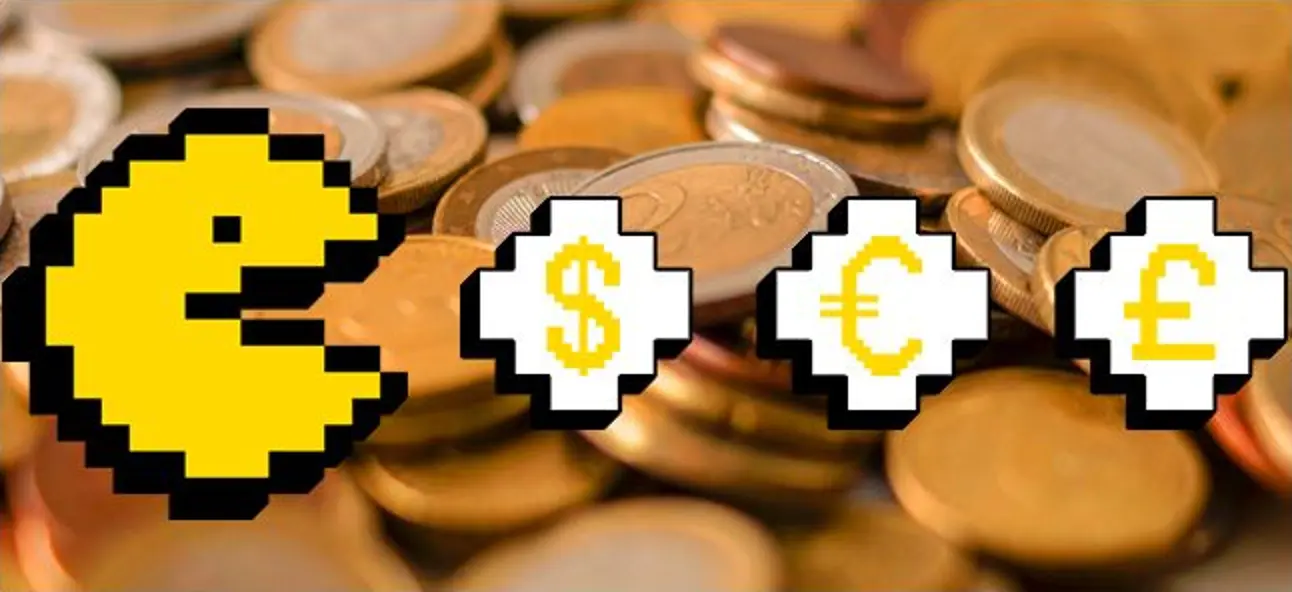

### Fonte dos dados: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

### Descrição das colunas:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Game</b> - Nome do jogo</li>
    <li><b>Year</b> - Ano de lançamento</li>
    <li><b>Genre</b> - Gênero</li>
    <li><b>Publisher</b> - Produtora</li>
    <li><b>North America</b> - Vendas na America do Norte (em milhões)</li>
    <li><b>Europe</b> - Vendas na Europa (em milhões)</li>
    <li><b>Japan</b> - Vendas no Japão (em milhões)</li>
    <li><b>Rest of World</b> - Vendas no restante do mundo (em milhões)</li>
    <li><b>Global</b> - Total de vendas (em milhões)</li>
</ul>

In [1]:
# Libs para Modelagem e Matrizes
import pandas as pd
import numpy as np

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados
Base_Dados = pd.read_csv('Projeto análise de mercado Video Games/PS4_GamesSales.csv')

# Verificando os dados
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimensão
Base_Dados.shape

(1034, 9)

In [4]:
# Checando os valores nulos
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

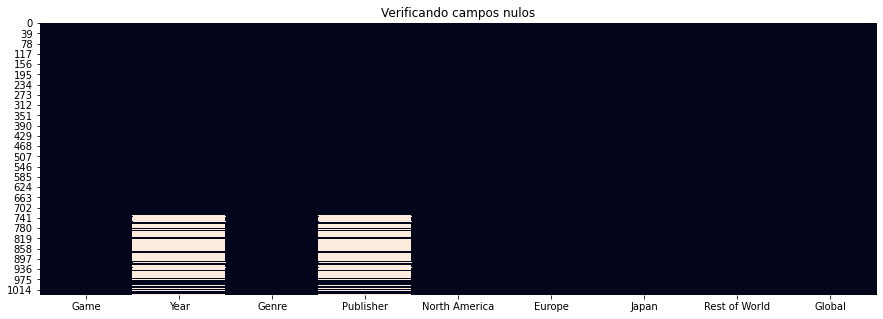

In [5]:
# Gráfico para visualizar os campos nulos
plt.figure(figsize=(15,5))
plt.title('Verificando campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar = False);

In [6]:
# Removendo os valores nulos da base
Base_Dados.dropna(inplace = True)

In [7]:
# Estatísticas
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


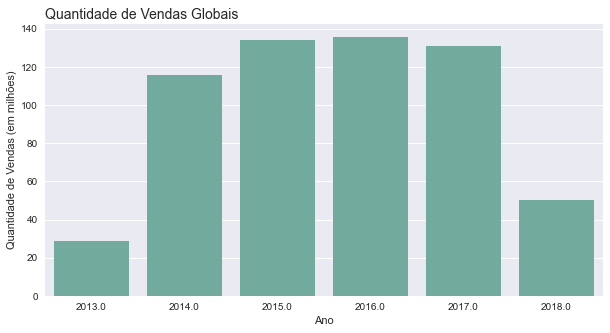

In [40]:
# Tamanho da imagem
plt.figure(figsize=(10,5))

# Título
plt.title('Quantidade de Vendas Globais', loc='left', fontsize = 14)

# Gráfico
sns.barplot(data = Base_Dados, x = 'Year', y = 'Global', ci = None, color = '#69b3a2', estimator = sum)

# Label
plt.xlabel('Ano');
plt.ylabel('Quantidade de Vendas (em milhões)');

In [9]:
# Retirandos os anos 2019 e 2020

Base_Dados = Base_Dados.loc[(Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

# Selecionei todos os anos, exceto 2019 e 2020, e atribuimos a variável Base_Dados


In [10]:
# Verificando os dados
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


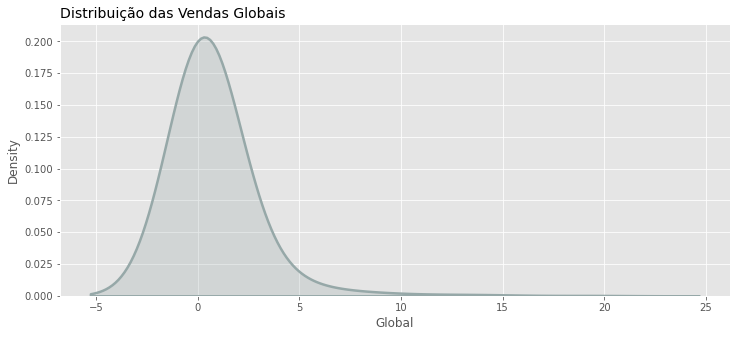

In [11]:
# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# Titulo
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14 )

# Plot
sns.kdeplot(Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );

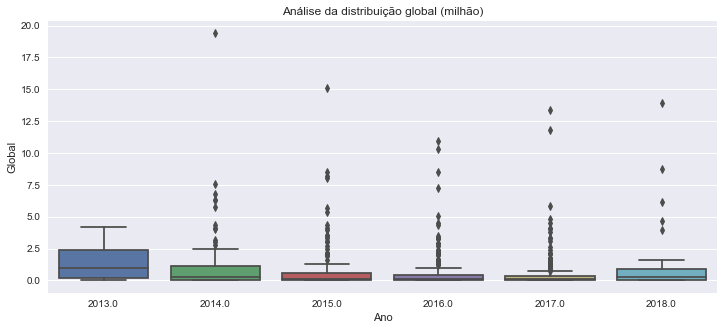

In [38]:
# Tamanho
plt.figure(figsize = (12, 5))

# Título
plt.title('Análise da distribuição global (milhão)')

# Gráfico
sns.boxplot(data = Base_Dados, x = 'Year', y = 'Global')
plt.xlabel('Ano');

In [13]:
# Jogos com vendas acima de 10 milhões
Base_Dados.loc[Base_Dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [14]:
Analise = Base_Dados.groupby( by=['Year'] ).sum().reset_index()

# Analisando a proporção dos 100% de cada continente comparado ao total
America = [America/Total * 100 for America, Total in zip(Analise ['North America'], Analise['Global'])]
Europa = [Europa/Total * 100 for Europa, Total in zip(Analise ['Europe'], Analise['Global'])]
Japao = [Japao/Total * 100 for Japao, Total in zip(Analise ['Japan'], Analise['Global'])]
Mundo = [Mundo/Total * 100 for Mundo, Total in zip(Analise ['Rest of World'], Analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.017687887155745,
  34.9248452696728,
  34.201680672268985,
  39.14342629482069],
 [44.78442280945758,
  46.715580492015526,
  41.95089185760131,
  42.72030651340992,
  43.68220015278841,
  37.250996015936266],
 [3.3727399165507648,
  3.090202848511003,
  5.433241286663184,
  7.110226937813121,
  6.936592818945754,
  8.22709163346613],
 [15.890125173852573,
  15.787656452309026,
  15.5832524815285,
  15.259357500736842,
  15.194805194805284,
  15.318725099601588])

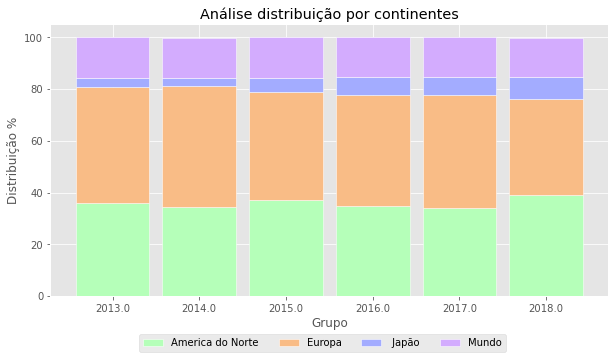

In [15]:
# Tamanho 
plt.figure( figsize=(10, 5) )

# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America do Norte', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.12), ncol=4 );

In [16]:
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [34]:
# Atribuindo um valor númerico para as colunas Produtor e Jogo.
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform( Base_Dados['Publisher'] )
Base_Dados['Jogo'] = Funcao_Label.fit_transform( Base_Dados['Game'] )

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [18]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

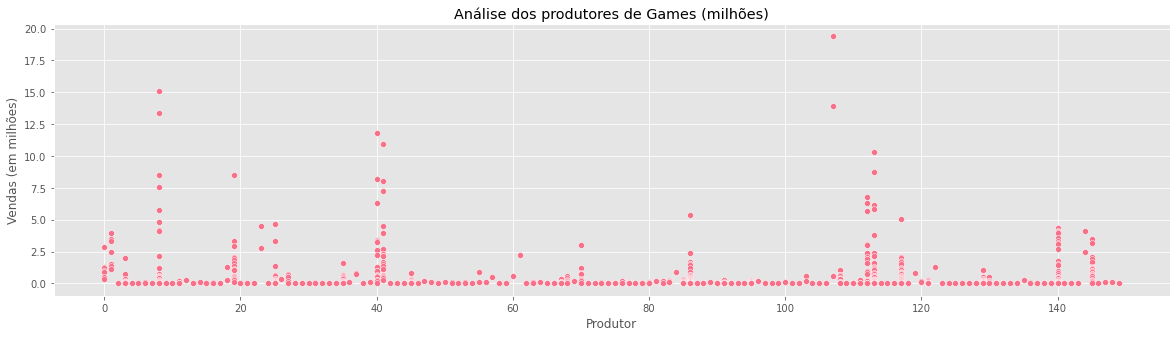

In [19]:
plt.figure(figsize = (20,5))
plt.title('Análise dos produtores de Games (milhões)')
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0])
plt.xlabel('Produtor')
plt.ylabel('Vendas (em milhões)');

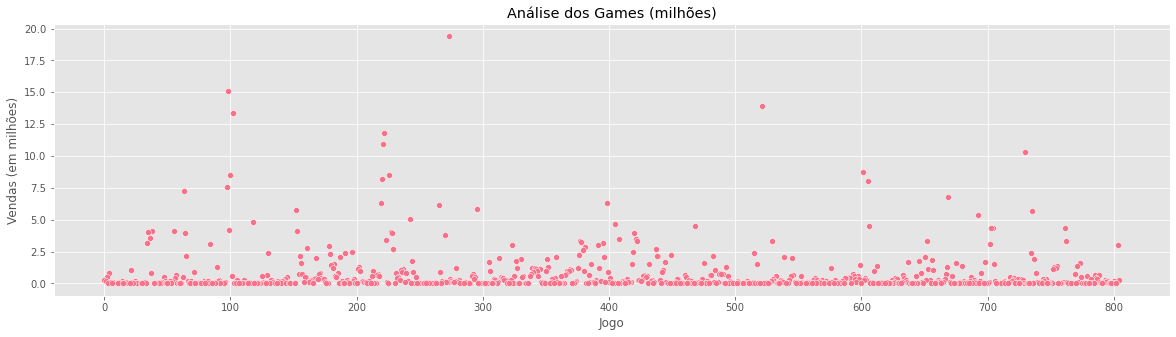

In [21]:
plt.figure(figsize = (20,5))
plt.title('Análise dos Games (milhões)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0])
plt.xlabel('Jogo')
plt.ylabel('Vendas (em milhões)');

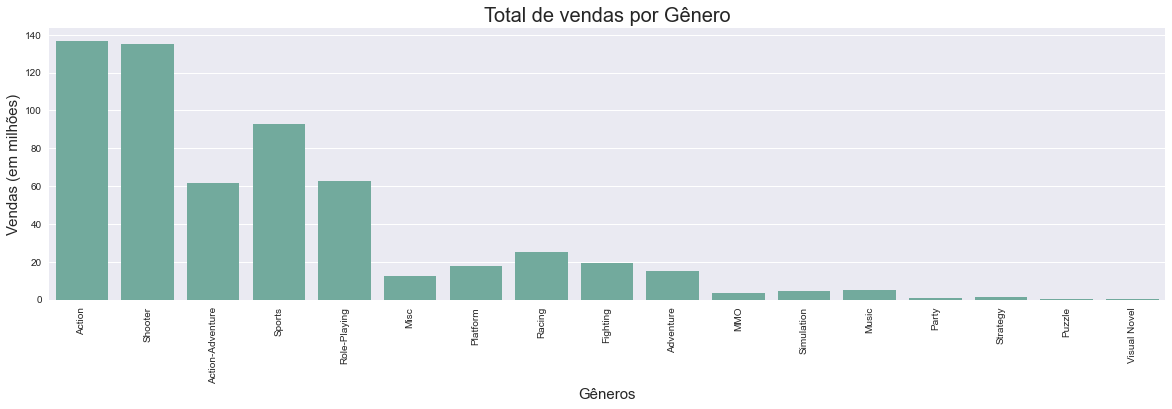

In [35]:
# Definindo a lista de gêneros
Lista_Genero = Base_Dados.Genre.unique().tolist()
Genero_vendas = []
for Genre in Lista_Genero:
    Genero_vendas.append(Base_Dados[Base_Dados.Genre == Genre].Global.sum())

fig = plt.figure(figsize=(20,5))
sns.barplot(Lista_Genero, Genero_vendas, color = '#69b3a2')
plt.xlabel('Gêneros', fontsize = 15)
plt.ylabel('Vendas (em milhões)', fontsize = 15)
plt.title('Total de vendas por Gênero', fontsize = 20)
plt.xticks(rotation=90);

# Report final com todos os gráficos

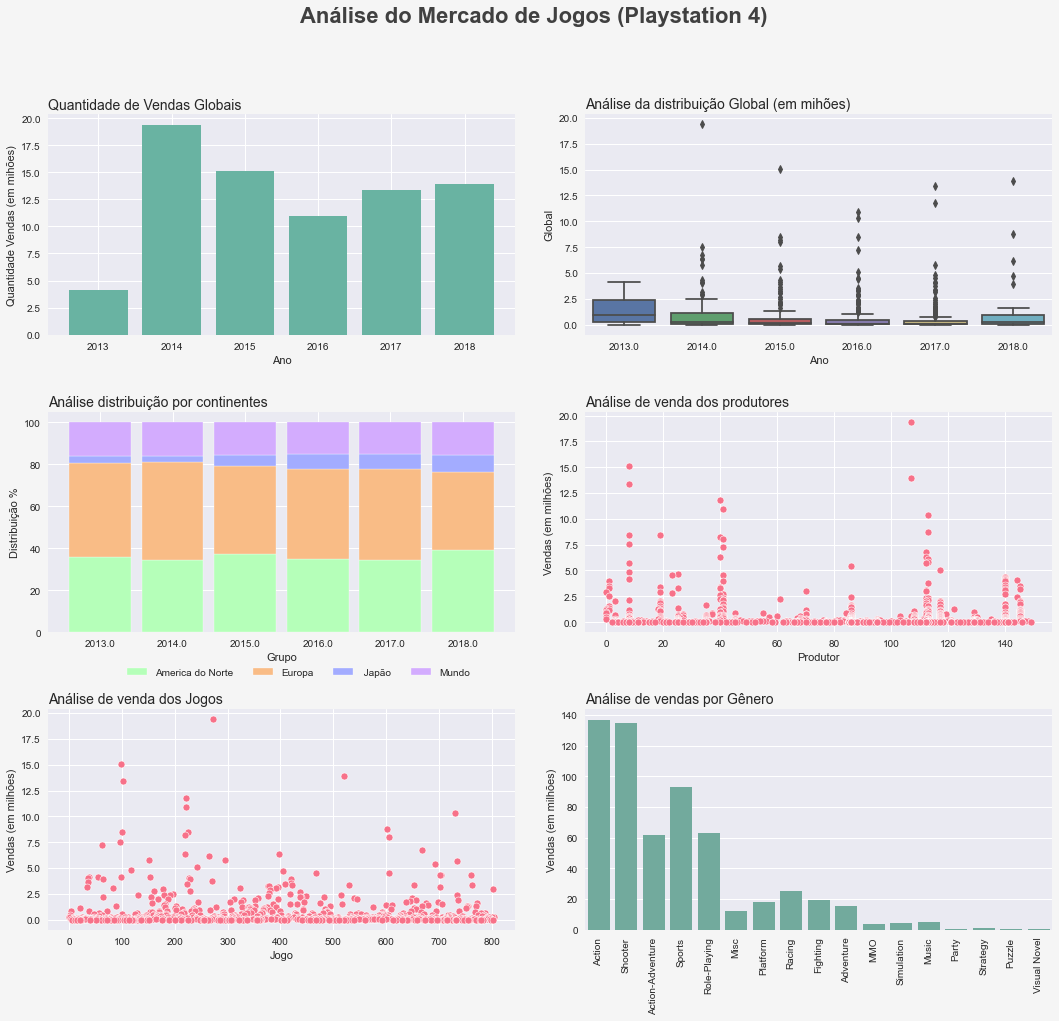

In [41]:
# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('seaborn')

# Titulo da figura
plt.suptitle('Análise do Mercado de Jogos (Playstation 4)', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid 
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais', loc='left', fontsize=14 )
# Grafico
plt.bar( Base_Dados['Year'], Base_Dados['Global'], color='#69b3a2' )
# Label
plt.xlabel('Ano');
plt.ylabel('Quantidade Vendas (em mihões)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# titulo
plt.title('Análise da distribuição Global (em mihões)', loc='left', fontsize=14)
# Plot
sns.boxplot( data=Base_Dados, x='Year', y='Global')
plt.xlabel('Ano')


# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)
# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America do Norte', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.12), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise de venda dos produtores', loc='left', fontsize=14 )
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0] );
plt.xlabel('Produtor')
plt.ylabel('Vendas (em milhões)')

# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Análise de venda dos Jogos', loc='left', fontsize=14)
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0] );
plt.xlabel('Jogo')
plt.ylabel('Vendas (em milhões)')

# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise de vendas por Gênero',loc='left', fontsize = 14)
sns.barplot(Lista_Genero, Genero_vendas, color = '#69b3a2')
plt.ylabel('Vendas (em milhões)')
plt.xticks(rotation=90)


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )